In [1]:
# Step 1 Import Libraries & Data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r"C:\Users\toloz\Instacart Basket Analysis 9_11_2024"

In [7]:
df_Fversion = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_customers_merged.pkl'))

 #  STEP 3.1 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [9]:
# Create a list grouping states by US region

In [10]:
df_Fversion.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,surname,gender,state,age,date_joined,n_dependants,martial_status,income,Merge_
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [14]:
Regions = []

for value in df_Fversion["state"]:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    Regions.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    Regions.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida' 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    Regions.append("South")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    Regions.append("West")
  else:
    Regions.append("No region assigned")

In [16]:
df_Fversion['region'] = Regions 

## Step 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [19]:
df_Fversion.dtypes

order_id                    object
user_id                     object
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
merge_indicator           category
price_range_loc             object
busiest day                 object
busiest days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spender_flag                object
Customer_frequency         float64
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state               

In [21]:
# Cross the spender_flag column with the region column
crosstab = pd.crosstab(df_Fversion['region'], df_Fversion['spender_flag'], dropna = False)

In [22]:
crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
No region assigned,20098,1241419
Northeast,108225,5614511
South,189593,9340775
West,160354,8132559


###  There is more low_spenders then high_spenders

# Step 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [27]:
# Create a flag for customers with less than 5 orders
df_Fversion.loc[df_Fversion['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_Fversion.loc[df_Fversion['max_order'] > 5, 'activity_flag'] = 'high-activity customer'

In [29]:
# Check values for activity_flag
df_Fversion['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30171424
low-activity customer      1440295
NaN                         793140
Name: count, dtype: int64

In [31]:
# Exclude low-activity customers from the dataframe
df_Fversion_exc = df_Fversion[df_Fversion['activity_flag'] != 'low-activity customer']

In [32]:
# Export the new dataframe
df_Fversion_exc.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# Step 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [36]:
# Profile bassed on age
df_Fversion_exc.loc[df_Fversion_exc['age'] <= 25, 'age_group'] = 'young adult'
df_Fversion_exc.loc[(df_Fversion_exc['age'] > 25) & (df_Fversion_exc['age'] <= 44), 'age_group'] = 'adult'
df_Fversion_exc.loc[(df_Fversion_exc['age'] > 44) & (df_Fversion_exc['age'] <= 64), 'age_group'] = 'middle-aged'
df_Fversion_exc.loc[df_Fversion_exc['age'] > 64, 'age_group'] = 'senior'

C:\Users\toloz\AppData\Local\Temp\ipykernel_23428\3873888791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fversion_exc.loc[df_Fversion_exc['age'] <= 25, 'age_group'] = 'young adult'


In [38]:
df_Fversion_exc.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,n_dependants,martial_status,income,Merge_,region,activity_flag,age_group
0,2539329,1,1,2,8,7.0,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer,adult
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer,adult
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity customer,adult


In [40]:
# Check values  for each age group
age_group_counts = df_Fversion_exc['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

# Step 6 Create an appropriate visualization to show the distribution of profiles.

In [43]:
age_group_counts = {
    'middle-aged': 9690051,
    'adult': 9214451,
    'senior': 8195544,
    'young adult': 3864518
}

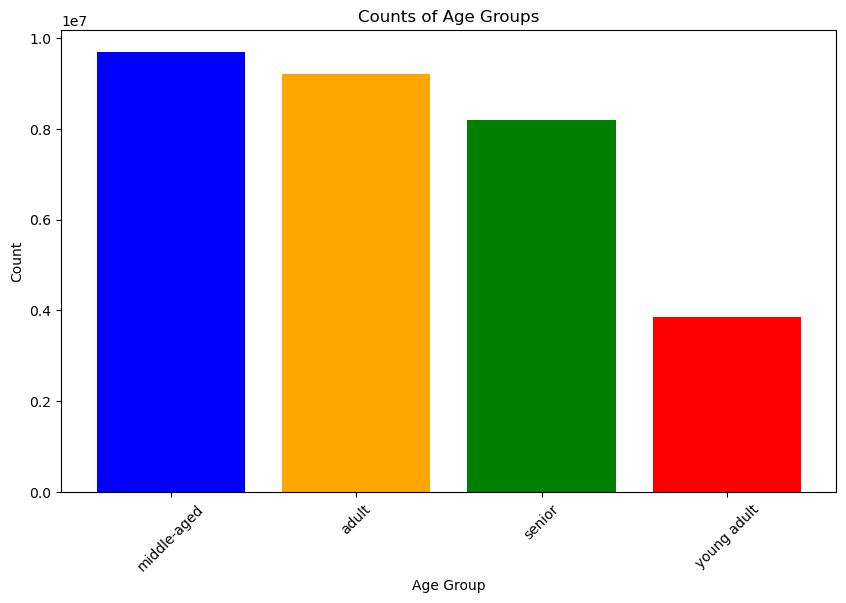

In [45]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(list(age_group_counts.keys()), list(age_group_counts.values()), color=['blue', 'orange', 'green', 'red'])

# Add titles and labels
plt.title('Counts of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Display the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualitations', 'age_group_distribution_barchart.png'))  # Save before plt.show()
plt.show()

In [47]:
# Profiling based on income 

In [49]:
# Create an income group variable
df_Fversion_exc.loc[df_Fversion_exc['income'] <= 55000, 'income_group'] = 'low-income'
df_Fversion_exc.loc[(df_Fversion_exc['income'] > 55000) & (df_Fversion_exc['income'] <= 150000), 'income_group'] = 'middle-income'
df_Fversion_exc.loc[df_Fversion_exc['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\toloz\AppData\Local\Temp\ipykernel_23428\504612469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fversion_exc.loc[df_Fversion_exc['income'] <= 55000, 'income_group'] = 'low-income'


In [53]:
# Check the counts of income groups
df_Fversion_exc['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

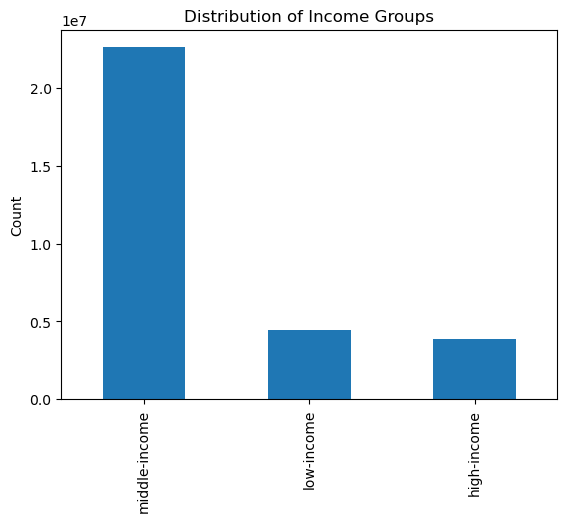

In [55]:
income_group_counts = df_Fversion_exc['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [59]:
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'income_distribution_bar.png'))

In [63]:
# Profiling base on dependents
# Create a dependents flag
df_Fversion_exc.loc[df_Fversion_exc['n_dependants'] == 0, 'dependents_flag'] = 'no dependents'
df_Fversion_exc.loc[df_Fversion_exc['n_dependants'] >= 1, 'dependents_flag'] = 'has dependents'

C:\Users\toloz\AppData\Local\Temp\ipykernel_23428\3626151197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fversion_exc.loc[df_Fversion_exc['n_dependants'] == 0, 'dependents_flag'] = 'no dependents'


In [67]:
# Check value counts
df_Fversion_exc['dependents_flag'].value_counts(dropna = False)

dependents_flag
has dependents    23224883
no dependents      7739681
Name: count, dtype: int64

In [73]:
# Profiling based on marital status / dependents
# Create a crosstab of marital_status and dependents_flag
crosstab_2 = pd.crosstab(df_Fversion_exc['martial_status'], df_Fversion_exc['dependents_flag'], dropna = False)
crosstab_2

dependents_flag,has dependents,no dependents
martial_status,,
divorced/widowed,0,2645271
living with parents and siblings,1481172,0
married,21743711,0
single,0,5094410


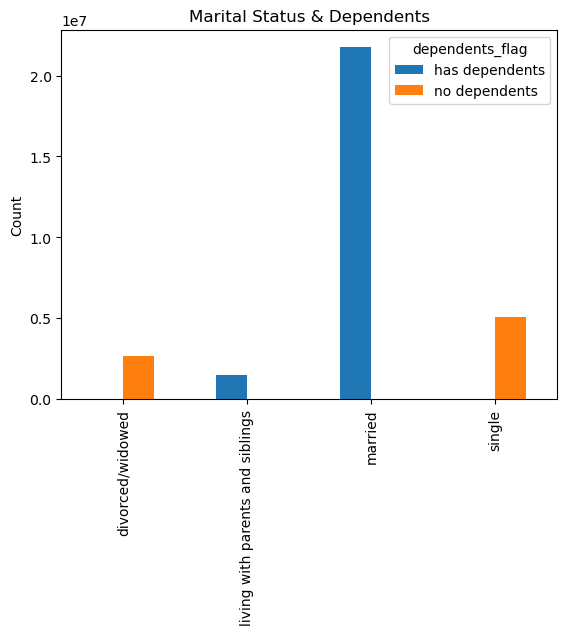

In [75]:
# Create a bar chart showing the distribution of the crosstab
marital_status_dependents_bar = crosstab_2.plot.bar()
plt.title('Marital Status & Dependents')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [77]:
marital_status_dependents_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'marital_status_dependents_bar.png'))

In [83]:
# Profile based on marital status / age group 
# Create a crosstab of marital_status and age_group
crosstab_3 = pd.crosstab(df_Fversion_exc['martial_status'], df_Fversion_exc['age_group'], dropna = False)
crosstab_3

age_group,adult,middle-aged,senior,young adult
martial_status,,,,
divorced/widowed,0,623313,2021958,0
living with parents and siblings,0,0,0,1481172
married,6901266,7238740,6173586,1430119
single,2313185,1827998,0,953227


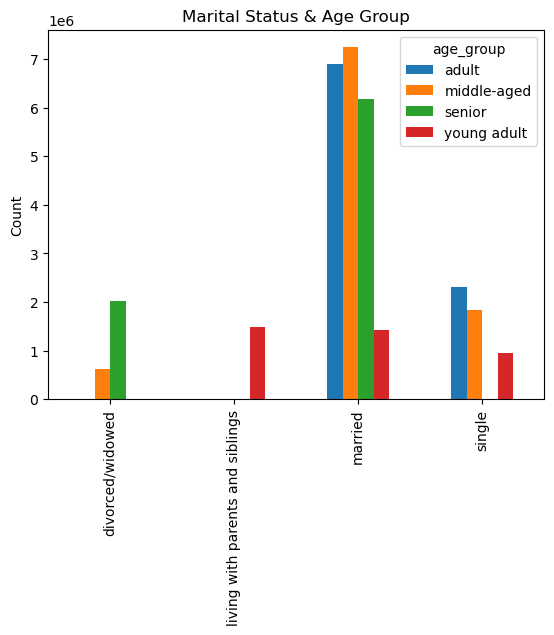

In [85]:
# Create a bar chart
marital_status_age_group_bar = crosstab_3.plot.bar()
plt.title('Marital Status & Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [89]:
# Export the chart
marital_status_age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'marital_status_age_group_bar.png'))

In [100]:
# Cross order frequency with age group
frequency_age_cross = pd.crosstab(df_Fversion_exc['frequency_flag'], df_Fversion_exc['age_group'], dropna = False)
frequency_age_cross

age_group,adult,middle-aged,senior,young adult
frequency_flag,,,,
Frequent Customer,6596426,6932080,5894633,2783753
Non_frequent_customer,647128,694888,574400,271001
Regular customer,1970897,2063083,1726511,809764


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent Customer'),
  Text(1, 0, 'Non_frequent_customer'),
  Text(2, 0, 'Regular customer')])

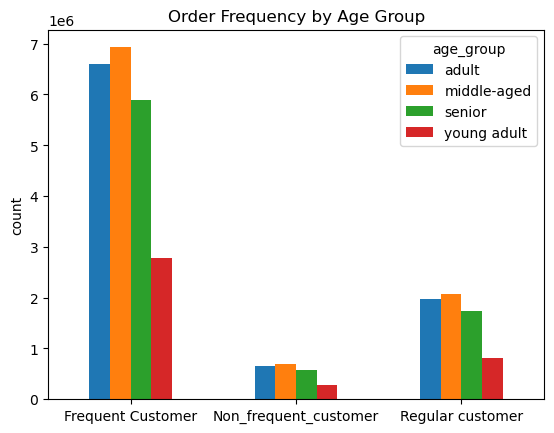

In [102]:
# Make a bar chart to more easily show results
frequency_age_bar = frequency_age_cross.plot.bar()
plt.title('Order Frequency by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [104]:
# Export the chart
frequency_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'frequency_age_group_bar.png'))

# STEP 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [94]:
df_Fversion_exc.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'merge_indicator', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'martial_status', 'income', 'Merge_', 'region',
       'activity_flag', 'age_group', 'income_group', 'dependents_flag'],
      dtype='object')

In [120]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_Fversion_exc.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'martial_status', 'age_group', 'order_number', 'order_dow', 'order_hour_of_day', 'loyalty_flag', 'frequency_flag', 'dependents_flag', 'income_group', 'spender_flag'])['prices'].sum().reset_index() 

In [122]:
customer_profile.head(3)

,user_id,gender,state,region,n_dependants,martial_status,age_group,order_number,order_dow,order_hour_of_day,loyalty_flag,frequency_flag,dependents_flag,income_group,spender_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,Regular customer,has dependents,low-income,Low_spender,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,Regular customer,has dependents,low-income,Low_spender,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,Regular customer,has dependents,low-income,Low_spender,28.2


In [126]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 
                                                         'prices': ['max', 'min', 'mean']})

In [128]:
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
10                 5   1   3.0  429.6   39.1  247.420000
100                5   1   3.0   97.6   23.4   53.240000
1000               7   1   4.0  134.4  112.9  123.714286
10000             72   1  36.5  298.2   11.8  122.022222
...              ...  ..   ...    ...    ...         ...
99994             11   1   6.0  174.0   86.2  126.800000
99995              5   1   3.0  132.5   42.6   79.580000
99996             12   1   6.5  127.1    2.8   79.050000
99998              5   1   3.0   51.2   20.8   38.020000
99999             34   1  17.5  159.7    6.7   70.541176

[162631 rows x 6 columns]

In [132]:
df_agg = df_Fversion_exc.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [134]:
df_agg

order_number                days_since_prior_order                
                 max min       mean                    max  min       mean
user_id                                                                   
1                 10   1   5.813559                   30.0  0.0  19.135593
10                 5   1   3.223776                   30.0  7.0  20.265734
100                5   1   3.555556                   30.0  7.0  24.888889
1000               7   1   3.980583                   30.0  5.0  10.970874
10000             72   1  35.973443                   17.0  0.0   4.989011
...              ...  ..        ...                    ...  ...        ...
99994             11   1   6.042683                   30.0  5.0  18.256098
99995              5   1   3.480000                   30.0  6.0  15.360000
99996             12   1   5.898438                   30.0  7.0  20.296875
99998              5   1   3.285714                   12.0  7.0   8.666667
99999             34   1  16.565350                   24.0  1.0   7.617021

[162631 rows x 6 columns]

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [139]:
# Create a crosstab of age group and region
age_region_cross = pd.crosstab(df_Fversion_exc['age_group'], df_Fversion_exc['region'], dropna = False)
age_region_cross

region,Midwest,No region assigned,Northeast,South,West
age_group,,,,,
adult,2172833,366263,1602358,2726460,2346537
middle-aged,2286479,372316,1697611,2822650,2510995
senior,1904046,316131,1484807,2392330,2098230
young adult,898155,150275,679909,1164714,971465


(array([0, 1, 2, 3]),
 [Text(0, 0, 'adult'),
  Text(1, 0, 'middle-aged'),
  Text(2, 0, 'senior'),
  Text(3, 0, 'young adult')])

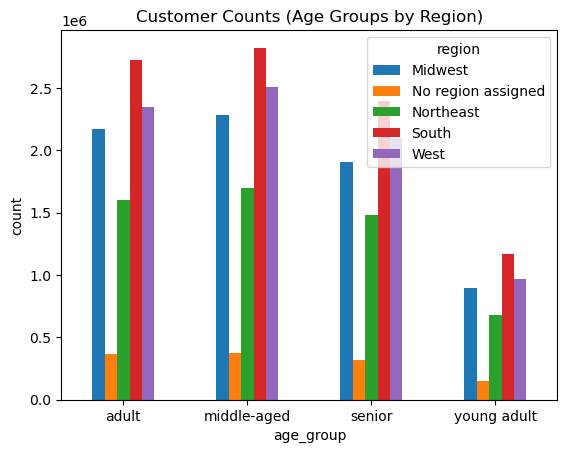

In [141]:
age_group_region_bar = age_region_cross.plot.bar()
plt.title('Customer Counts (Age Groups by Region)')
plt.ylabel('count')
plt.xticks(rotation=0)

In [145]:
# Create a crosstab to show spending power by region
income_region_cross = pd.crosstab(df_Fversion_exc['income_group'], df_Fversion_exc['region'], dropna = False)

In [147]:
income_region_cross

region,Midwest,No region assigned,Northeast,South,West
income_group,,,,,
high-income,916961,141097,677680,1149206,1009590
low-income,1025408,174133,789479,1335050,1128318
middle-income,5319144,889755,3997526,6621898,5789319


(array([0, 1, 2]),
 [Text(0, 0, 'high-income'),
  Text(1, 0, 'low-income'),
  Text(2, 0, 'middle-income')])

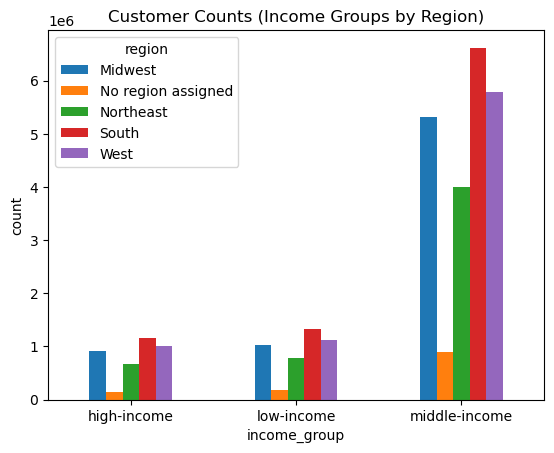

In [149]:
# Make a bar chart to more easily show results
income_region_bar = income_region_cross.plot.bar()
plt.title('Customer Counts (Income Groups by Region)')
plt.ylabel('count')
plt.xticks(rotation=0)

In [151]:
# Export bar charts
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'age_group_region_bar.png'))
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualitations', 'income_region_bar.png'))

In [157]:
# Create a crosstab to show order frequency by region
frequency_region_cross = pd.crosstab(df_Fversion_exc['frequency_flag'], df_Fversion_exc['region'], dropna = False)

In [159]:
frequency_region_cross

region,Midwest,No region assigned,Northeast,South,West
frequency_flag,,,,,
Frequent Customer,5166347,867176,3919037,6540136,5714196
Non_frequent_customer,523619,84385,379091,647988,552334
Regular customer,1571547,253424,1166557,1918030,1660697


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent Customer'),
  Text(1, 0, 'Non_frequent_customer'),
  Text(2, 0, 'Regular customer')])

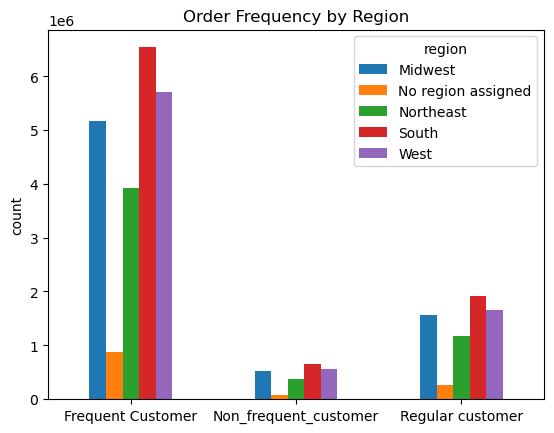

In [161]:
# Make a bar chart to more easily show results
frequency_region_bar = frequency_region_cross.plot.bar()
plt.title('Order Frequency by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [163]:
# Export bar chart
frequency_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'frequency_region_bar.png'))

In [167]:
# Create a crosstab to show customer loyalty by region
loyalty_region_cross = pd.crosstab(df_Fversion_exc['loyalty_flag'], df_Fversion_exc['region'], dropna = False)

In [169]:
loyalty_region_cross

region,Midwest,No region assigned,Northeast,South,West
loyalty_flag,,,,,
Loyal customer,2373774,383417,1841785,3022427,2662690
New customer,1136761,182986,842156,1410678,1231114
Regular customer,3750978,638582,2780744,4673049,4033423


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

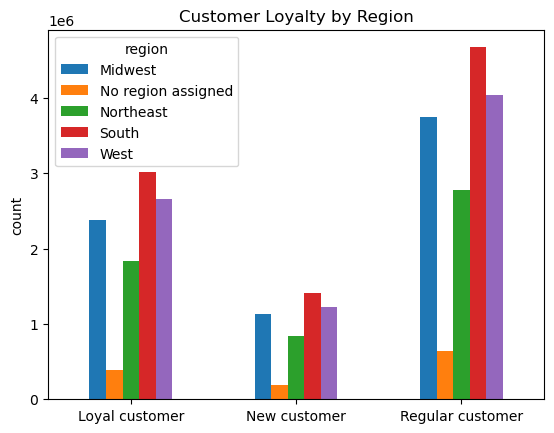

In [171]:
# Make a bar chart to more easily show results
loyalty_region_bar = loyalty_region_cross.plot.bar()
plt.title('Customer Loyalty by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [173]:
# Export bar chart
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'loyalty_region_bar.png'))

In [177]:
# Create a crosstab of spending flag and region
spender_region_cross = pd.crosstab(df_Fversion_exc['spender_flag'], df_Fversion_exc['region'], dropna = False)
spender_region_cross

region,Midwest,No region assigned,Northeast,South,West
spender_flag,,,,,
High_spender,148678,18855,103120,180484,152288
Low_spender,7112835,1186130,5361565,8925670,7774939


(array([0, 1]), [Text(0, 0, 'High_spender'), Text(1, 0, 'Low_spender')])

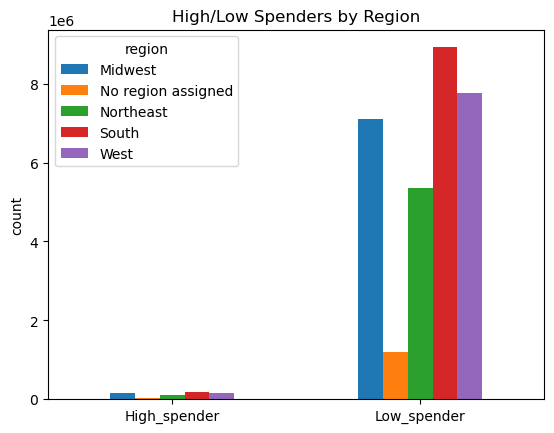

In [179]:
# Make a bar chart to more easily show results
spender_region_bar = spender_region_cross.plot.bar()
plt.title('High/Low Spenders by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [181]:
# Export bar chart
spender_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'spender_region_bar.png'))

In [183]:
# Import departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [185]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [187]:
# Rename unnamed column
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [189]:
df_Fversion_exc.dtypes

order_id                    object
user_id                     object
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
merge_indicator           category
price_range_loc             object
busiest day                 object
busiest days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spender_flag                object
Customer_frequency         float64
frequency_flag              object
first_name                  object
surname                     object
gender                      object
state               

In [191]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [195]:
df_final_merged = df_Fversion_exc.merge(df_dept, on='department_id', indicator=False)

In [197]:
df_final_merged['_merge'].value_counts(dropna = False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [199]:
# Dropping merge column
df_final_merged.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,n_dependants,martial_status,income,Merge_,region,activity_flag,age_group,income_group,dependents_flag,department
0,2539329,1,1,2,8,7.0,196,1,0,both,...,3,married,40423,both,South,high-activity customer,adult,low-income,has dependents,beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,...,3,married,40423,both,South,high-activity customer,adult,low-income,has dependents,beverages


In [201]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

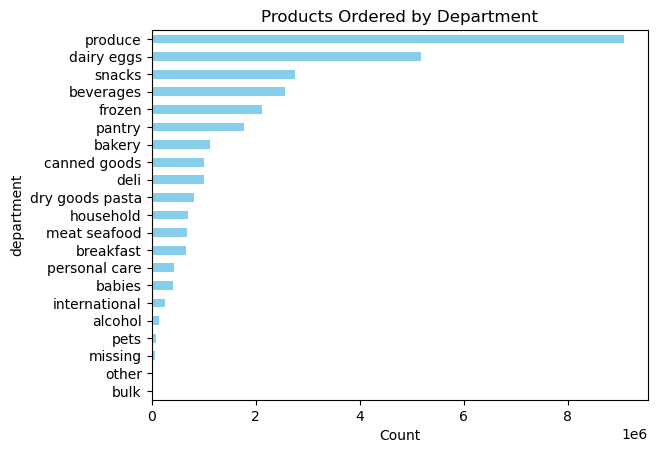

In [203]:
# Make a bar chart showing the frequency of orders for each department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='skyblue', xlabel = 'Count', title='Products Ordered by Department')

In [205]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'depts_bar.png'))

In [207]:
# Create a crosstab of age group and department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,42167,123044,334154,754851,198803,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125522,27034,2712590,824677
middle-aged,46579,129910,350804,814687,211274,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134736,28293,2830853,867564
senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
young adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


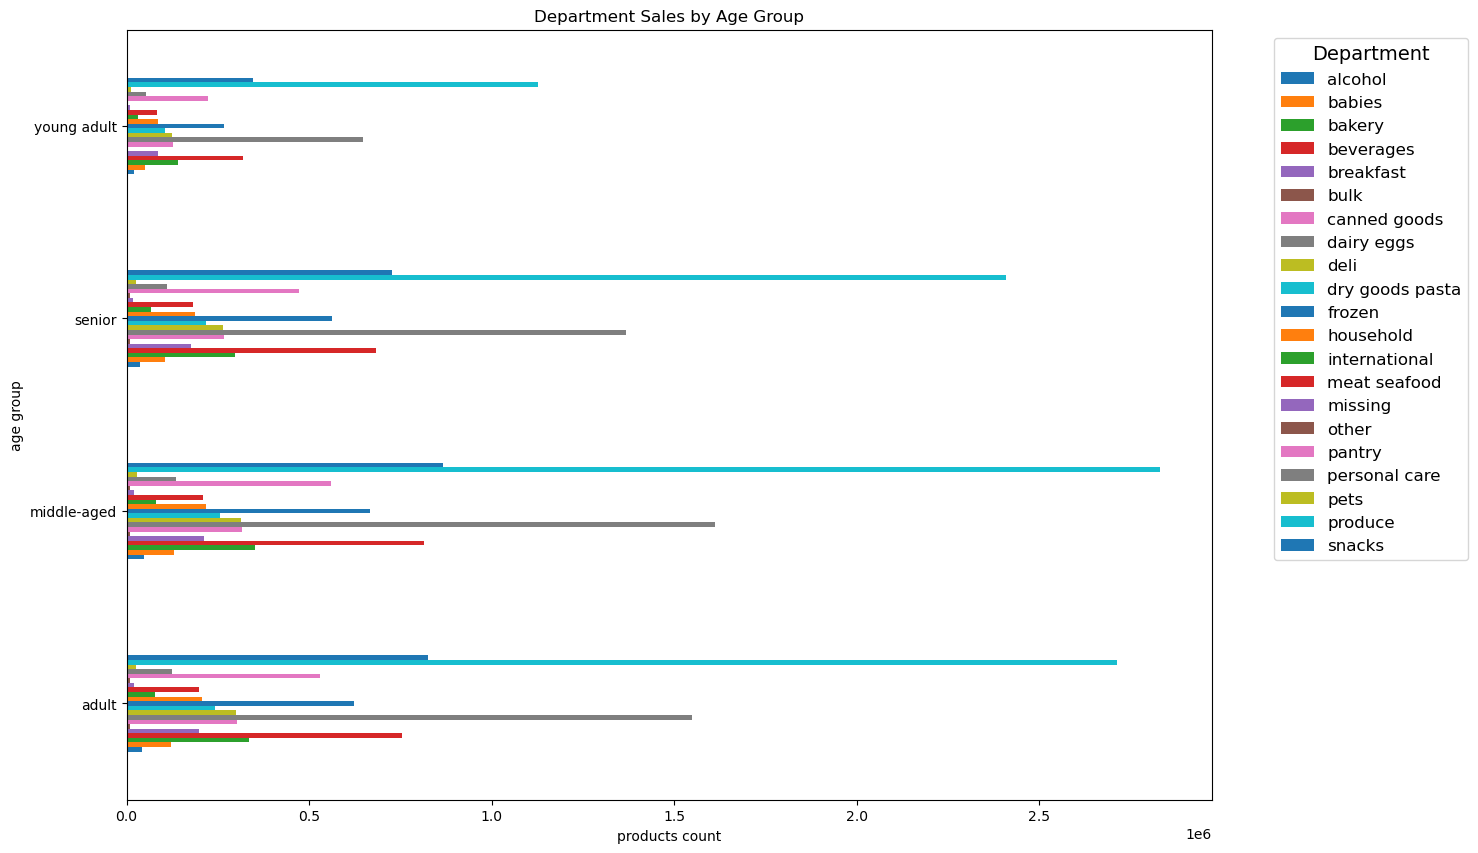

In [209]:
# Make a bar chart to more easily show results
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [215]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations','age_depts_bar.png'))

In [217]:
# Create a crosstab of income group and department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24067,53001,148430,313325,83418,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53530,12991,1134490,305779
low-income,22199,43438,144086,479742,116540,5974,112945,680816,141758,92401,...,111508,30240,54717,8902,4958,226221,62888,11782,1139552,673753
middle-income,98361,313953,828312,1778834,470892,23806,766740,3837217,736190,623400,...,495675,192929,528550,47613,24899,1324569,307888,68287,6805231,1786874


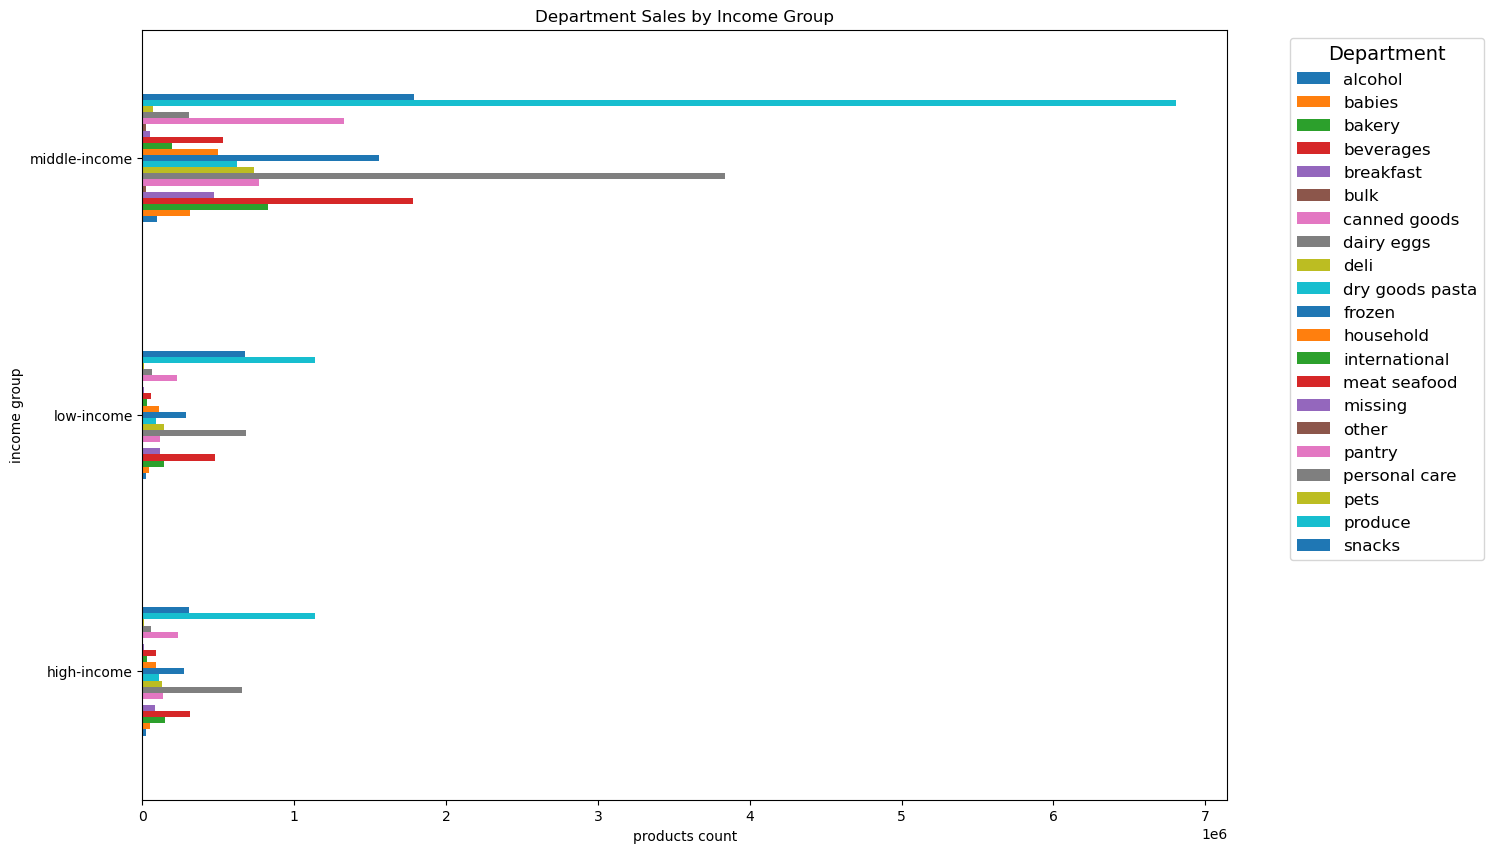

In [219]:
# Make a bar chart to more easily show results
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [223]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'income_depts_bar.png'))

# Produce suitable charts to illustrate your results and export them in your project folder.

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Friday'),
 Text(3, 0, 'Monday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

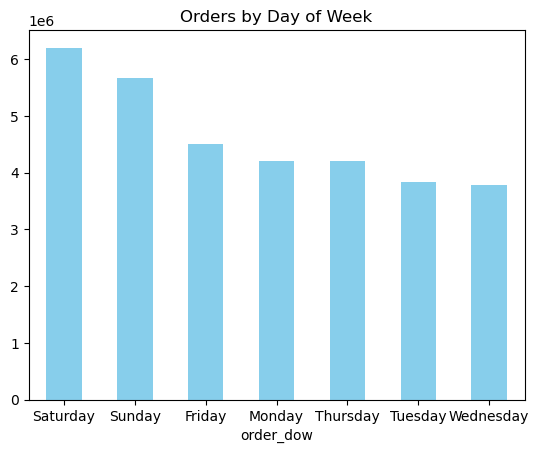

In [234]:
# Create a bar chart showing orders by day of week
orders_dow_bar = df_Fversion['order_dow'].value_counts().plot.bar(color = 'skyblue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], rotation=0)

In [236]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'orders_dow_bar.png'))

Text(0.5, 1.0, 'Orders by Hour of Day')

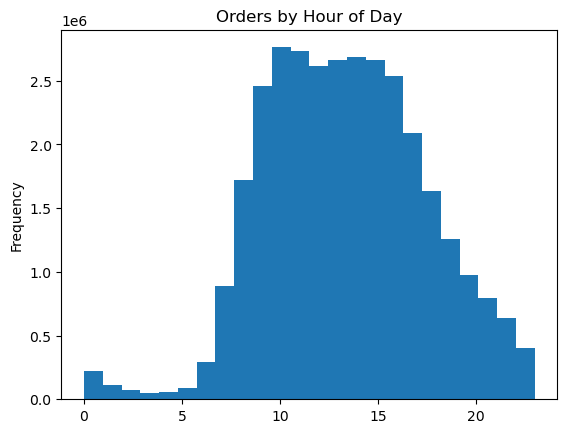

In [240]:
# Create a histogram for the order_hour_of_day column
hist_hod = df_Fversion['order_hour_of_day'].plot.hist(bins = 24)
hist_hod.set_title('Orders by Hour of Day')

In [244]:
# Export histogram
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'hist_hour_of_day.png'))